In [10]:
import cv2
import numpy as np
# 입력 영상 불러오기
src = cv2.imread('HAI Lab/52.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()
    
# 사장형 지정을 통한 초기 분할
rc = cv2.selectROI(src) # 초기 위치 지정하고 모서리 좌표 4개를 튜플값으로 반환
mask = np.zeros(src.shape[:2], np.uint8) # 마스크는 검정색으로 채워져있고 입력 영상과 동일한 크기

# 결과를 계속 업데이트 하고 싶으면 bgd, fgd 입력
cv2.grabCut(src, mask, rc, None, None, 5, cv2.GC_INIT_WITH_RECT)

# grabCut 자료에서 0,2는 배경, 1,3은 전경입니다.
# mask == 0 or mask == 2를 만족하면 0으로 설정 아니면 1로 설정합니다
mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')

# np.newaxis로 차원 확장
dst = src * mask2[:, :, np.newaxis]

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
import colorsys

class Color:
    def __init__(self,RGB,HLS,HSV):
        self.RGB = RGB
        self.HLS = HLS
        self.HSV = HSV

def Normalize(Value,Min,Max):
    Output = Value
    if Value > Max:
        Output = Max
    elif Value < Min:
        Output = Min
    return Output

def complementaryColor(ColorInput):
    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Change the Hue value to the Hue opposite
    HueValue = ColorInput.HLS[0] * 360
    ColorInput.HLS[0] = ((HueValue + 180) % 360)/360

    # Convert HLS (between 0 and 1) to RGB (base 256)
    return list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorInput.HLS[0],ColorInput.HLS[1],ColorInput.HLS[2])))

def triadicColor(ColorInput):

    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first triadic Hue
    FirstTriadicHue = ((ColorInput.HLS[0] * 360 + 120) % 360) / 360

    # Find the second triadic Hue
    SecondTriadicHue = ((ColorInput.HLS[0] * 360 + 240) % 360) / 360

    ColorOutput1 = Color("",[FirstTriadicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondTriadicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB]

def splitComplementaryColor(ColorInput):
    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first triadic Hue
    FirstSplitComplementaryHue = ((ColorInput.HLS[0] * 360 + 150) % 360) / 360

    # Find the second triadic Hue
    SecondSplitComplementaryHue = ((ColorInput.HLS[0] * 360 + 210) % 360) / 360

    ColorOutput1 = Color("",[FirstSplitComplementaryHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondSplitComplementaryHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB]

def tetradicColor(ColorInput):

    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first tetradic Hue
    FirstTetradicHue = ((ColorInput.HLS[0] * 360 + 60) % 360) / 360

    # Find the second tetradic Hue
    SecondTetradicHue = ((ColorInput.HLS[0] * 360 + 180) % 360) / 360

    # Find the third tetradic Hue
    ThirdTetradicHue = ((ColorInput.HLS[0] * 360 + 240) % 360) / 360


    ColorOutput1 = Color("",[FirstTetradicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondTetradicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput3 = Color("",[ThirdTetradicHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))
    ColorOutput3.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput3.HLS[0],ColorOutput3.HLS[1],ColorOutput3.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB,ColorOutput3.RGB]

def analogousColor(ColorInput):
    # Convert RGB (base 256) to HLS (between 0 and 1 )
    ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Find the first analogous Hue
    FirstAnalogousHue = ((ColorInput.HLS[0] * 360 + 30) % 360) / 360

    # Find the second analogous Hue
    SecondAnalogousHue = ((ColorInput.HLS[0] * 360 - 30) % 360) / 360

    ColorOutput1 = Color("",[FirstAnalogousHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")
    ColorOutput2 = Color("",[SecondAnalogousHue,ColorInput.HLS[1],ColorInput.HLS[2]],"")

    ColorOutput1.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput1.HLS[0],ColorOutput1.HLS[1],ColorOutput1.HLS[2])))
    ColorOutput2.RGB = list(map(lambda x: round(x * 255),colorsys.hls_to_rgb(ColorOutput2.HLS[0],ColorOutput2.HLS[1],ColorOutput2.HLS[2])))

    return [ColorOutput1.RGB,ColorOutput2.RGB]

def monochromaticColor(ColorInput):
    # Convert RGB (base 256) to HSV (between 0 and 1)
    ColorInput.HSV = list(colorsys.rgb_to_hsv(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))

    # Generate 10 monochromatic colors with a step of 5%
    increment = [0,0.05,0.10]
    result = []
    output = []
    for x in increment:
        for y in increment:
            result.append(list(map(lambda x: Normalize(round(x * 255),0,255), colorsys.hsv_to_rgb(ColorInput.HSV[0],Normalize(ColorInput.HSV[1],0,100) + x,Normalize(ColorInput.HSV[2] + y,0,100)))))
            result.append(list(map(lambda x: Normalize(round(x * 255),0,255), colorsys.hsv_to_rgb(ColorInput.HSV[0],Normalize(ColorInput.HSV[1],0,100) - x,Normalize(ColorInput.HSV[2] - y,0,100)))))
    [output.append(x) for x in result if x not in output]
    return output

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def rgb_to_hex(color):
    r, g, b = color
    return ('#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)).upper()

def make_palette(colors):
    cnt = len(colors)
    array = np.zeros([100, 100*cnt, 3], dtype=np.uint8)
    hex_code = []
    for i in range(1, cnt+1):
        if i == 1:
            array[:,:100] = colors[i-1]
            hex_code.append(rgb_to_hex(colors[i-1]))
        else:
            array[:,100*(i-1):] = colors[i-1]
            hex_code.append(rgb_to_hex(colors[i-1]))
            
    plt.figure(figsize=(10*cnt,2))
    for i, code in enumerate(hex_code):
        plt.text(15+100*i,55,code, fontsize=15)
    plt.imshow(array)
    plt.show()

In [3]:
import random
def adjustingColor(colors):
#     lit_vals = [1, 1.5, 0.8]
#     sat_vals = [1, 1.5, 0.8]
    hue_vals = [0,-30,30,180]
#     l_val = random.choice(lit_vals)
#     s_val = random.choice(sat_vals)
    result = []
    for c in colors:
        ColorInput = Color(c,"","")
        ColorInput.HLS = list(colorsys.rgb_to_hls(ColorInput.RGB[0] / 255, ColorInput.RGB[1] / 255, ColorInput.RGB[2] / 255))
        
        h_val = random.choice(hue_vals)
        changed_hue = ((ColorInput.HLS[0] * 360 + h_val) % 360) / 360
        l_val, s_val = 0, 0
        if ColorInput.HLS[1] < 0.4:
            l_val = random.choice([0.3,0.5,0.7])     
        elif ColorInput.HLS[1] > 0.6:
            l_val = random.choice([1.3,1.5,1.7])
        else:
            l_val = 1
            
        if ColorInput.HLS[2] < 0.4:
            s_val = random.choice([0.3,0.5,0.7])
        elif ColorInput.HLS[2] > 0.6:
            s_val = random.choice([1.3,1.5,1.7])
        else:
            s_val = 1
            
        changed_lit = ColorInput.HLS[1]/l_val
        changed_sat = ColorInput.HLS[2]/s_val

        ColorOutput = list(map(lambda x: Normalize(round(x * 255),0,255), colorsys.hls_to_rgb(changed_hue,changed_lit,changed_sat)))
        result.extend([c, ColorOutput])
    return result

In [6]:
#color = [141,161,185]
#color = [51,92,103]
#color = [252,239,239]
# color = [242,149,89]
color = [197, 202, 226]

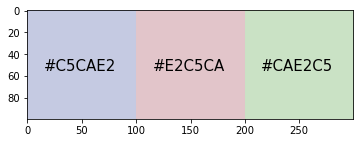

In [7]:
Cyan = Color(color,"","")
test = triadicColor(Cyan)
test = [color]+test
make_palette(test)

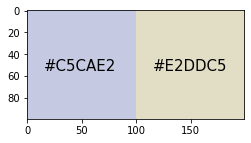

In [8]:
Cyan = Color(color,"","")
test2 = complementaryColor(Cyan)
test2 = [color]+[test2]
make_palette(test2)

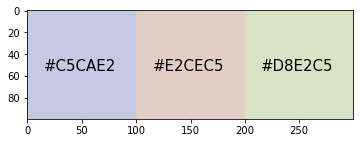

In [9]:
Cyan = Color(color,"","")
test3 = splitComplementaryColor(Cyan)
test3 = [color]+test3
make_palette(test3)

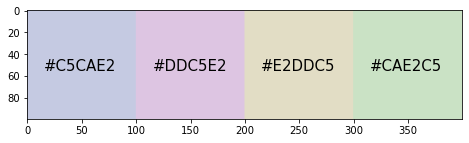

In [10]:
Cyan = Color(color,"","")
test4 = tetradicColor(Cyan)
test4 = [color]+test4
make_palette(test4)

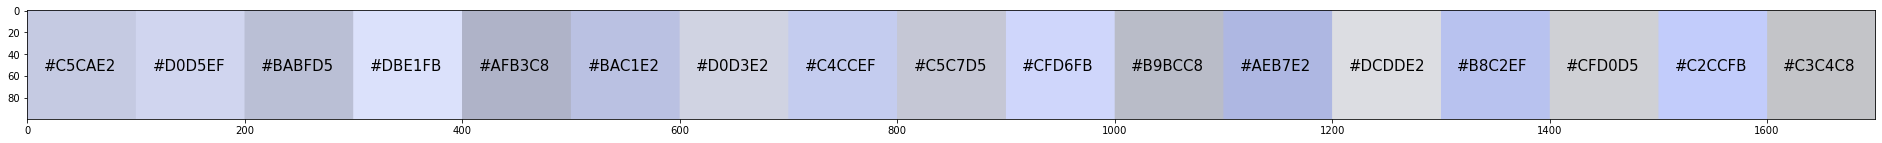

In [11]:
Cyan = Color(color,"","")
test5 = monochromaticColor(Cyan)
make_palette(test5)

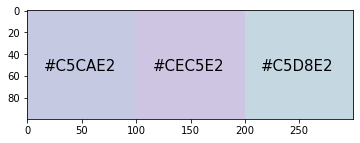

In [12]:
Cyan = Color(color,"","")
test6 = analogousColor(Cyan)
test6 = [color]+test6
make_palette(test6)

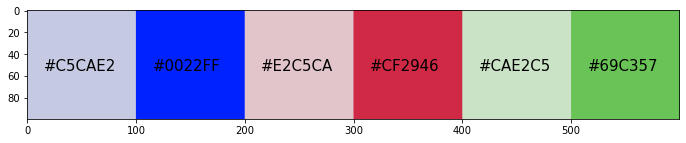

In [13]:
result = adjustingColor(test)
make_palette(result)

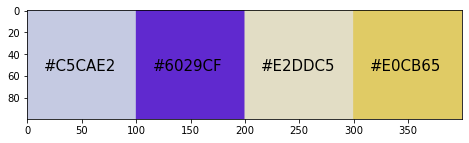

In [14]:
result = adjustingColor(test2)
make_palette(result)

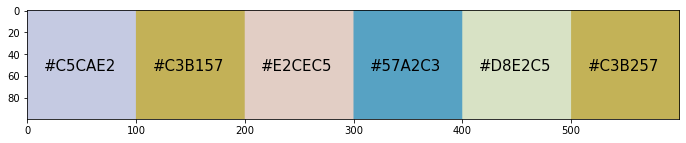

In [15]:
result = adjustingColor(test3)
make_palette(result)

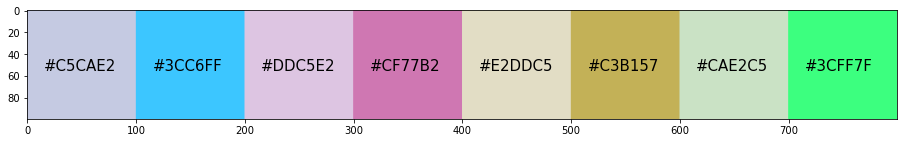

In [16]:
result = adjustingColor(test4)
make_palette(result)

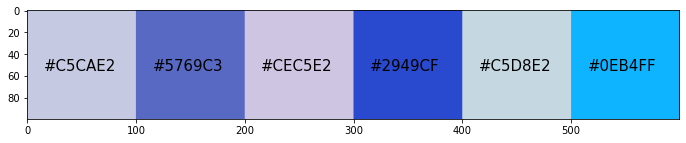

In [17]:
result = adjustingColor(test6)
make_palette(result)